In [231]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation as ani

In [232]:
# constant from kuramoto
kuramoto_const = 0.02 # くらもと　ていす
n = 2  # number of Metronome
dt = 0.03  # time
time_end = 60 # end time of simulation

#initial thedas & omegas
initial_theda = [3*math.pi/2, math.pi/2]
omega = [174*math.pi/60,170.65*math.pi/60] # natural oscillation freqency
color = ["chocolate", "forestgreen"]

In [233]:
t = np.linspace(0,time_end,int(time_end/dt))
theda = initial_theda.copy()
thedas = []

def sinSum(theda, idx, n):
    temp = 0
    for i in range(n):
        temp += math.sin(theda[i]-theda[idx])
    return temp

for i in range(n):
    thedas.append([])

for i in range(int(time_end/dt)):
    
    for i in range(n):
        thedadot = omega[i] + kuramoto_const/n*sinSum(theda,i,n)
        theda[i] += thedadot * dt

    for i in range(n):
        thedas[i].append(theda[i])

<Figure size 432x288 with 0 Axes>

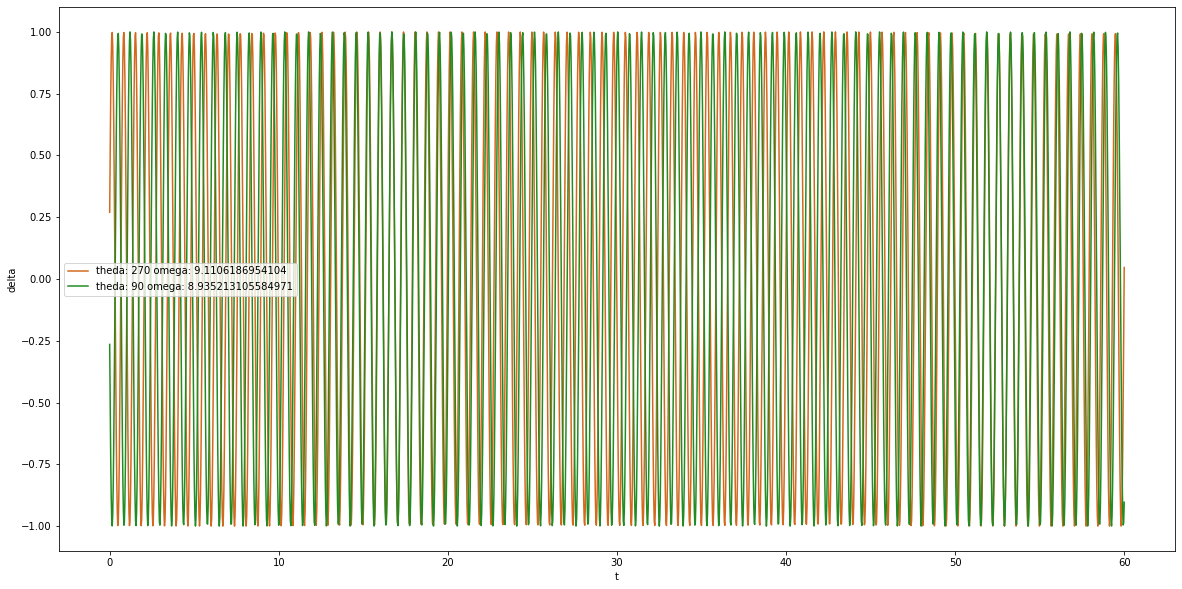

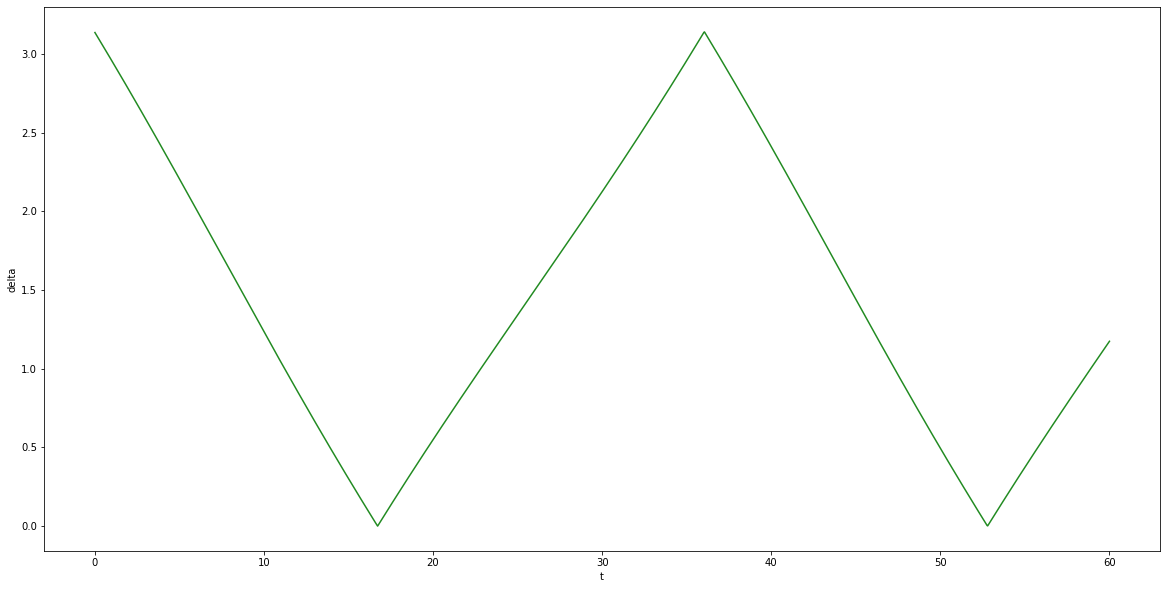

In [234]:
thedas = np.array(thedas)

plt.figure(1)
plt.figure(figsize = (20,10))
plt.xlabel("t")
plt.ylabel("delta")
for i in range(n):
    plt.plot(t,np.cos(thedas[i]), label = "theda: {:.0f} omega: {}".format(initial_theda[i]/math.pi*180,omega[i]), color = color[i])

plt.legend()

plt.figure(2)
plt.figure(figsize = (20,10))
plt.xlabel("t")
plt.ylabel("delta")
plt.plot(t,np.arccos(np.cos(thedas[1] - thedas[0])), label = "theda: {:.0f} omega: {}".format(initial_theda[i]/math.pi*180,omega[i]), color = color[i])

MovieWriter ffmpeg unavailable; using Pillow instead.


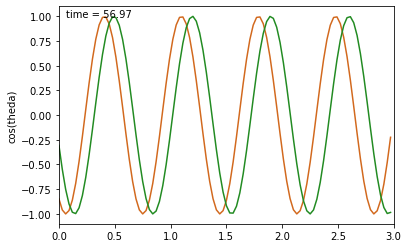

In [235]:
#animation 1
fig = plt.figure()
ax = fig.add_subplot(111,autoscale_on=False, xlim=(0, dt*100), ylim=(-1.1, 1.1))
line1, = ax.plot([],[],color = color[0])
line2, = ax.plot([],[],color = color[1])
ax.set_ylabel("cos(theda)")
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def init():
  line1.set_data([],[])
  line2.set_data([],[])
  time_text.set_text('')
  return line1, line2, time_text

def update_linechart(i):
  line1.set_data(t[0:100], np.cos(thedas[0][i:i+100]))
  line2.set_data(t[0:100], np.cos(thedas[1][i:i+100]))
  time_text.set_text('time = %.2f' % (i*dt))
  return line1, line2

anim = ani.FuncAnimation(fig, update_linechart, frames = len(t)-100, interval = 20, init_func = init, blit=True)
anim.save('osc1.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


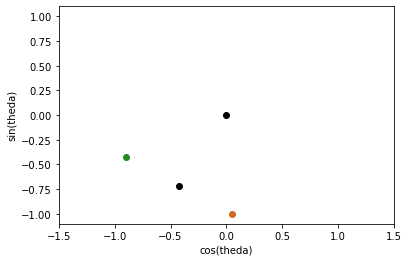

In [236]:
def avg(array, idx):
  sum = 0
  for i in range(n):
    sum += array[i][idx]
  return sum/n

#animation 2
fig2, ax2 = plt.subplots()

def update_polarchart(i):
  ax2.clear()
  ax2.set_xlim(-1.5,1.5)
  ax2.set_ylim(-1.1,1.1)
  ax2.set_xlabel("cos(theda)")
  ax2.set_ylabel("sin(theda)")
  for j in range(n):
    ax2.plot(np.cos(thedas[j][i]), np.sin(thedas[j][i]), "o", color = color[j], lw = 50)
  ax2.plot(0,0, "o", color = "black", lw = 2)
  ax2.plot(avg(np.cos(thedas), i),avg(np.sin(thedas), i), "o", color = "black", lw = 50)

anim2 = ani.FuncAnimation(fig2, update_polarchart, frames = len(thedas[0]), interval = 50)
anim2.save('osc2.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


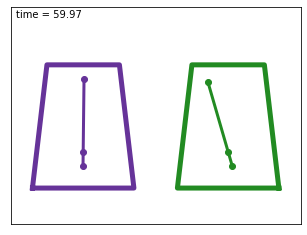

In [237]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False, xlim=(-2, 2), ylim=(-1, 2))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
line1, = ax.plot([],[],'-o',lw = 3,color = 'rebeccapurple')
line2, = ax.plot([],[],'-o',lw = 3,color = 'forestgreen')
met1, = ax.plot([-1.7,-1.5,-0.5,-0.3,-1.7],[-0.5,1.2,1.2,-0.5,-0.5],'-',lw = 5,color = 'rebeccapurple')
met2, = ax.plot([1.7,1.5,0.5,0.3,1.7],[-0.5,1.2,1.2,-0.5,-0.5],'-',lw = 5,color = 'forestgreen')
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def arc(theda):
    return math.acos(math.cos(theda))

def init():
    time_text.set_text('')
    line1.set_data([],[])
    line2.set_data([],[])
    return line1, line2, time_text

pi = 3.14159265359
divide = 4

def animate(i):
    line1.set_data(([-1+np.cos((arc(thedas[0][i])-pi/2)/divide+pi/2),-1,-1-0.2*np.cos((arc(thedas[0][i])-pi/2)/divide+pi/2)],[np.fabs(np.sin((arc(thedas[0][i])-pi/2)/divide+pi/2)),0,-0.2*np.fabs(np.sin((arc(thedas[0][i])-pi/2)/divide+pi/2))]))
    line2.set_data(([1+np.cos((arc(thedas[1][i])-pi/2)/divide+pi/2),1,1-0.2*np.cos((arc(thedas[1][i])-pi/2)/divide+pi/2)],[np.fabs(np.sin((arc(thedas[1][i])-pi/2)/divide+pi/2)),0,-0.2*np.fabs(np.sin((arc(thedas[1][i])-pi/2)/divide+pi/2))]))

    time_text.set_text('time = %.2f' % (i*dt))
    return line1, line2, time_text, met1, met2

anima = ani.FuncAnimation(fig, animate, frames=len(t), interval=25, blit=True, init_func=init)
anima.save('osc3.gif')

(10000,)
99.99000000000001
dw1_dt
1.00321042540004
-0.00985308960862319
dw2_dt
1.00321042540004
0.0100891424425569
21.2195728107394


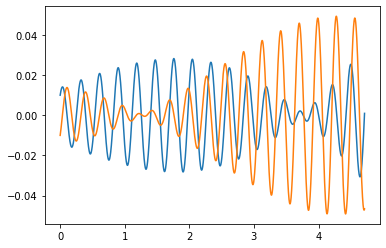

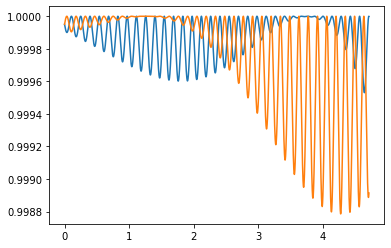

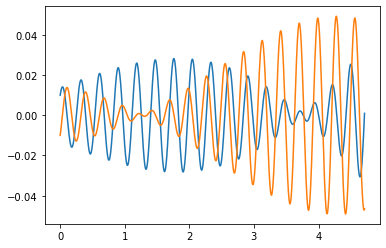

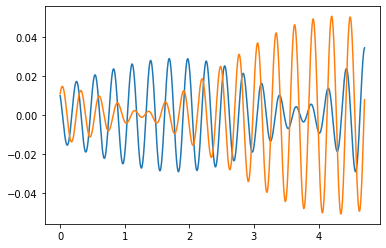

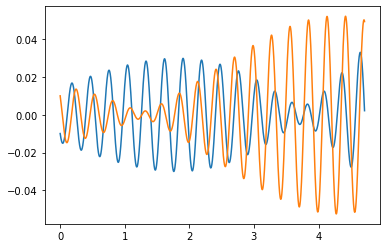

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy.solvers.ode.systems import dsolve_system
import math

from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)  # For better representation

g = 9.8
rcm = 0.017
m = 0.95**2*math.pi*1.3*8.96*10**(-3)
I = m*(0.009**2+0.017**2)
M = 0.403
B = (m*rcm/(M+2*m))*(m*rcm/I)
u = 0.01
theta_1 = 0.01  # design
theta_2 = -0.01
theta_0 = 0.39
f1 = 0.01 #這是角速度吧
f2 = 0.011
omega = sqrt(m*rcm*g/I)
delta = (f1-f2)/(omega)
ga = 0.025

dt = 0.01
t = np.arange(0, 100, dt)
print(t.shape)
print(t[-1])
t_size = (int)(100/dt)
cta1 = np.zeros(t_size)
cta1_b = np.zeros(t_size)
cta1_bb = np.zeros(t_size)
cta2 = np.zeros(t_size)
cta2_b = np.zeros(t_size)
cta2_bb = np.zeros(t_size)
tmp = 0# used for counting
cta1[0] = theta_1
cta2[0] = theta_2
cta1_b[0] = f1
cta2_b[0] = f2
dw1_dt_0_l = 1 / \
        (1-((B**2*sqrt((1-cta1[tmp]**2)*(1-cta2[tmp]**2))
             )/(1-B*sqrt(1-cta2[tmp]**2))))
dw1_dt_0_r = (((-B*sqrt(1-cta1[tmp]**2))/(1-B*sqrt(1-cta2[tmp]**2)))*((1-delta)*cta2[tmp]+u*((cta2[tmp]/theta_0) ** 2-1)
                  * cta2_b[tmp]) - (1+delta)*cta1[tmp] - u*((cta1[tmp]/theta_0)**2-1)*cta1_b[tmp]) / (1-B*sqrt(1-cta1[tmp]**2))
dw1_dt_0 = dw1_dt_0_l * dw1_dt_0_r
print("dw1_dt")
print(dw1_dt_0_l)
print(dw1_dt_0_r)

dw2_dt_0_l = 1 / \
        (1-((B**2*sqrt((1-cta1[tmp]**2)*(1-cta2[tmp]**2))
             )/(1-B*sqrt(1-cta1[tmp]**2))))
dw2_dt_0_r = (((-B*sqrt(1-cta2[tmp]**2))/(1-B*sqrt(1-cta1[tmp]**2)))*((1+delta)*cta1[tmp]+u*((cta1[tmp]/theta_0)
                  ** 2-1)*cta1_b[tmp]) - (1-delta)*cta2[tmp] - u*((cta2[tmp]/theta_0)**2-1)*cta2_b[tmp]) / (1-B*sqrt(1-cta2[tmp]**2))
dw2_dt_0 = dw2_dt_0_l * dw2_dt_0_r
print("dw2_dt")
print(dw2_dt_0_l)
print(dw2_dt_0_r)
    

    
cta1_bb[0] = dw1_dt_0
cta2_bb[0] = dw2_dt_0


tmp += 1
print(omega)
for i in t:
    if (i != t[-1]):


        cta1_b[tmp] = cta1_b[tmp-1] + cta1_bb[tmp-1]*dt
        cta2_b[tmp] = cta2_b[tmp-1] + cta2_bb[tmp-1]*dt
        cta1[tmp] = cta1[tmp-1] + cta1_b[tmp-1]*dt
        cta2[tmp] = cta2[tmp-1] + cta2_b[tmp-1]*dt

        dw1_dt_0_l = 1 / \
            (1-((B**2*sqrt((1-cta1[tmp]**2)*(1-cta2[tmp]**2))
                )/(1-B*sqrt(1-cta2[tmp]**2))))
        dw1_dt_0_r = (((-B*sqrt(1-cta1[tmp]**2))/(1-B*sqrt(1-cta2[tmp]**2)))*((1-delta)*cta2[tmp]+u*((cta2[tmp]/theta_0) ** 2-1)
                    * cta2_b[tmp]) - (1+delta)*cta1[tmp] - u*((cta1[tmp]/theta_0)**2-1)*cta1_b[tmp]) / (1-B*sqrt(1-cta1[tmp]**2))
        dw1_dt_0 = dw1_dt_0_l * dw1_dt_0_r

        dw2_dt_0_l = 1 / \
            (1-((B**2*sqrt((1-cta1[tmp]**2)*(1-cta2[tmp]**2))
                )/(1-B*sqrt(1-cta1[tmp]**2))))
        dw2_dt_0_r = (((-B*sqrt(1-cta2[tmp]**2))/(1-B*sqrt(1-cta1[tmp]**2)))*((1+delta)*cta1[tmp]+u*((cta1[tmp]/theta_0)
                    ** 2-1)*cta1_b[tmp]) - (1-delta)*cta2[tmp] - u*((cta2[tmp]/theta_0)**2-1)*cta2_b[tmp]) / (1-B*sqrt(1-cta2[tmp]**2))
        dw2_dt_0 = dw2_dt_0_l * dw2_dt_0_r
        
        cta1_bb[tmp] = dw1_dt_0
        cta2_bb[tmp] = dw2_dt_0
        
        while(cta1[tmp] > 2*pi):
            cta1[tmp] = cta1[tmp] - 2*pi
        while(cta2[tmp] > 2*pi):
            cta2[tmp] = cta2[tmp] - 2*pi
    tmp += 1


t = t/omega

plt.plot(t, (cta1))
plt.plot(t, (cta2))
plt.show()

plt.plot(t, np.cos(cta1))
plt.plot(t, np.cos(cta2))
plt.show()

plt.plot(t, np.sin(cta1))
plt.plot(t, np.sin(cta2))
plt.show()

plt.plot(t,cta1_b)
plt.plot(t,cta2_b)
plt.show()

plt.plot(t, cta1_bb)
plt.plot(t, cta2_bb)
plt.show()

